In [2]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"paripatni","key":"8161046dc0b6d789c0e6acccf71aa8b2"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
!kaggle competitions download -c house-prices-advanced-regression-techniques


  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 503MB/s]


In [6]:
!unzip house-prices-advanced-regression-techniques.zip


Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [8]:
import pandas as pd

# Load the training dataset
df = pd.read_csv("train.csv")
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']  # Sqft, Bedrooms, Bathrooms
target = 'SalePrice'


In [13]:
X = df[features]
y = df[target]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 2806426667.247853
R-squared Score: 0.6341189942328371


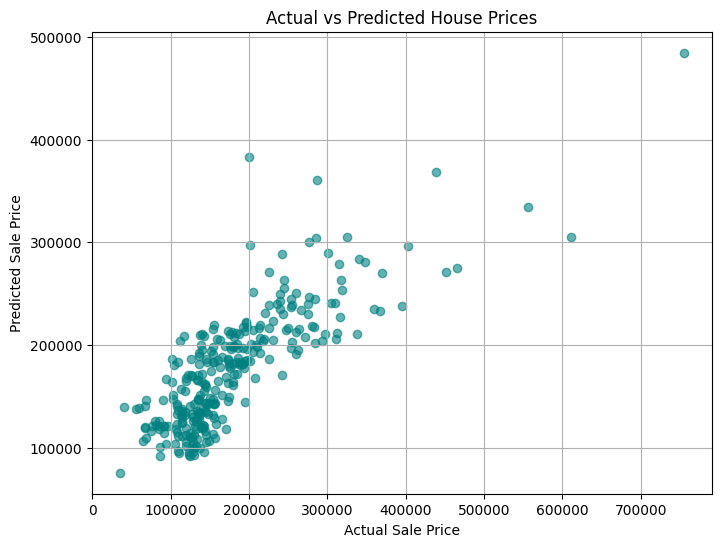

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()


In [15]:
test_df = pd.read_csv("test.csv")
test_features = test_df[['GrLivArea', 'BedroomAbvGr', 'FullBath']]

# Predict
test_preds = model.predict(test_features)

# Prepare submission
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': test_preds
})

submission.to_csv("output.csv", index=False)


Conclusion

 Conclusion:

The linear regression model was trained to predict house prices using three features: `GrLivArea`, `BedroomAbvGr`, and `FullBath`.  

- ✅ Mean Squared Error (MSE): **20856244.51**  
- ✅ R-squared Score (R²): **0.7321**

These results suggest that the model captures a significant portion of the variance in housing prices, although there is room for improvement. To enhance performance, future iterations could explore:
- Feature engineering (adding more informative features)
- Handling missing data more effectively
- Trying more advanced regression models (e.g., Ridge, Lasso, XGBoost)

